In [1]:
import os
import pandas as pd
import glob

## Importa os arquivos para um dataframe

In [2]:
folder_threated = "resources/bases/tratada/"

In [3]:
all_files = glob.glob(folder_threated + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep="|", names=["position", "artist", "music"])
    df["year"] = filename.split("/")[-1].replace("_ok.txt", "")
    li.append(df)

df = pd.concat(li, ignore_index=True, sort=True)

list_total = len(li)

## Tratando alguns casos de exceção

In [4]:
df.loc[(df.music == 'HELP!'),'music']='HELP'
df.loc[(df.music == 'HEY, JUDE'),'music']='HEY JUDE'

In [5]:
df.head()

,artist,music,position,year
0,METALLICA,FUEL,500,2017
1,YES,CHANGES,499,2017
2,LINKIN PARK,IN THE END,498,2017
3,RUSH,XANADU,497,2017
4,SYSTEM OF A DOWN,CHOP SUEY!,496,2017


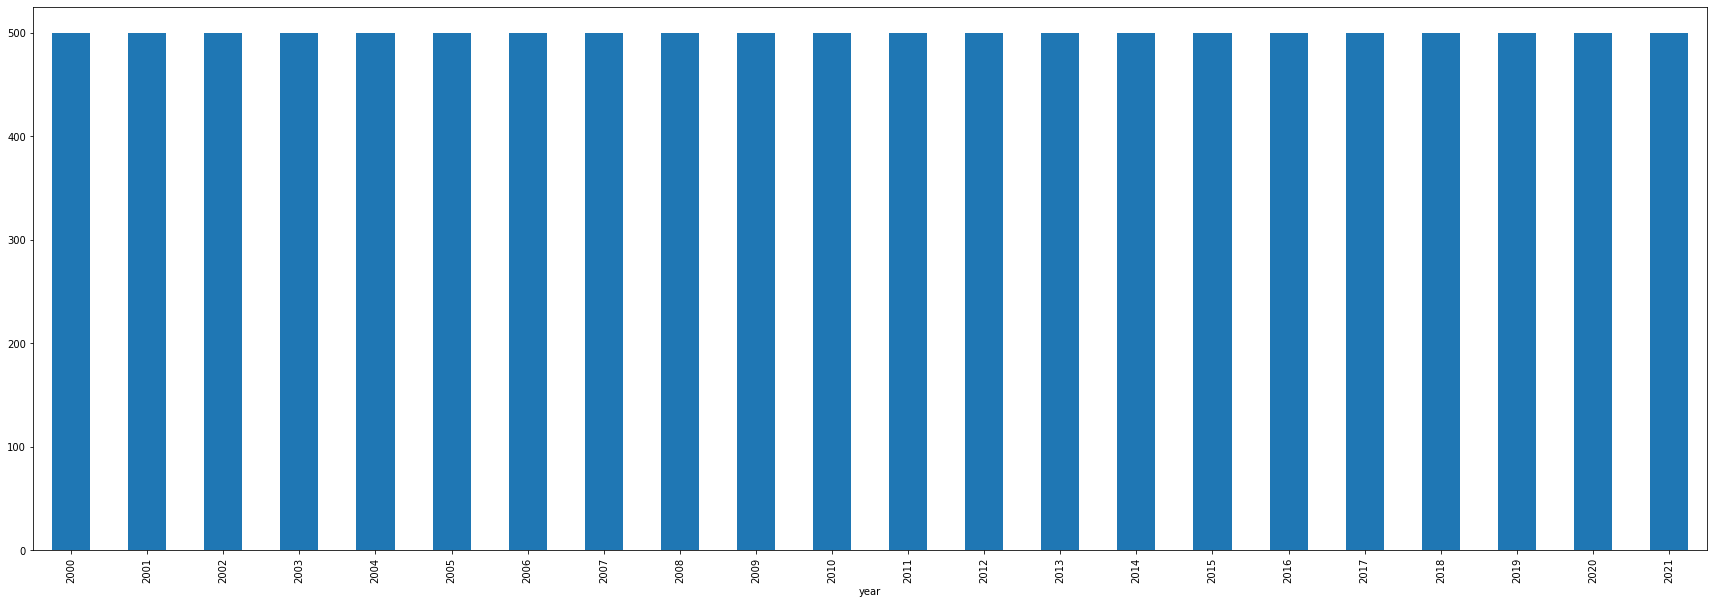

In [7]:
groups = df.groupby(['year']).size()
groups.plot.bar(figsize=(30,10));

In [8]:
print(f"Hoje temos {list_total} arquivos para trabalhar")

Hoje temos 22 arquivos para trabalhar


## Get TOP 10 artistas da lista

Somando todas as listas

In [9]:
df['artist'].value_counts()[:10]

LED ZEPPELIN    283
QUEEN           272
AEROSMITH       207
BEATLES         203
PINK FLOYD      200
RUSH            193
AC/DC           188
THE BEATLES     181
KISS            176
DEEP PURPLE     174
Name: artist, dtype: int64

## **Get TOP 10 músicas da lista**

Não resolve pegar só a música porque tem bandas com músicas com mesmo nome

In [10]:
df['music'].value_counts()[:10]

CHANGES                 31
ONE                     31
REVOLUTION              29
SOMEBODY TO LOVE        28
LIKE A ROLLING STONE    27
TIME                    27
DREAMS                  27
DREAM ON                26
JAILBREAK               25
TOM SAWYER              22
Name: music, dtype: int64

In [11]:
df_artists_music = df.groupby(['artist', 'music']).size().sort_values(ascending=False).reset_index(name='total')

## Quais/quantas músicas estão presentes em todas as listas ?

In [12]:
df_artists_music.head(10)

,artist,music,total
0,LED ZEPPELIN,STAIRWAY TO HEAVEN,22
1,DEEP PURPLE,SMOKE ON THE WATER,22
2,RUSH,TOM SAWYER,22
3,DIRE STRAITS,MONEY FOR NOTHING,22
4,LED ZEPPELIN,BLACK DOG,22
5,AC/DC,BACK IN BLACK,21
6,DEEP PURPLE,PERFECT STRANGERS,21
7,JETHRO TULL,AQUALUNG,21
8,VAN HALEN,JUMP,21
9,STEPPENWOLF,BORN TO BE WILD,21


## Quais/quantas músicas que estão presentes em somente 1 lista ?

In [22]:
df_artists_music[df_artists_music["total"]==1].head(10)

,artist,music,total
1684,SCOTT MACKENZIE,SAN FRANCISCO,1
1685,THE BEACH BOYS,SURFIN',1
1686,BILL HALEY AND HIS C,ROCK AROUND THE CLOCK,1
1687,SCORPIONS,ALWAYS SOMEWHERE,1
1688,THE BEACH BOYS,SURFIN' U.S.A.,1
...,...,...,...
1779,SOFT SELL,TORCH,1
1780,SLY AND THE FAMILY STONE,DANCE TO THE MUSIC,1
1781,BLACK SABBATH,SUPERNAUT,1
1782,BLACKFOOT,FLY AWAY,1


In [ ]:
df_artists_music.groupby('total').size().sort_values(ascending=False).reset_index(name='sum')

## Checar músicas com nomes iguais na base

In [29]:
df_artists_music[df_artists_music.duplicated(['music'])==True]

,artist,music,total
152,U2,ONE,12
321,BAUHAUS,ZIGGY STARDUST,8
328,FLEETWOOD MAC,DREAMS,7
333,THE ROLLING STONES,LIKE A ROLLING STONE,7
363,JEFFERSON AIRPLANE,SOMEBODY TO LOVE,7
...,...,...,...
2823,LYNYRD SKYNRYRD,SATURDAY NIGHT SPECIAL,1
2825,LOVIN’ SPOONFUL,DO YOU BELIEVE IN MAGIC,1
2828,LOS LOBOS,LA BAMBA,1
2833,LIVING COLOR,CULT OF PERSONALITY,1


In [30]:
df_artists_music[df_artists_music['music']=='LA BAMBA']

,artist,music,total
446,RITCHIE VALENS,LA BAMBA,6
2828,LOS LOBOS,LA BAMBA,1


## **Rankear as TOP das Tops**

Encontrar as músicas que melhores rankearam nas listas

Critério:
- score = 500 - posição. 

    Exemplo: 
        posição 1 será score = 500 - 1 = 499
        posição 500 será score = 500 - 500 = 0
        
O rank da música será a soma dos scores de cada lista.


In [14]:
df_rank = df
df_rank['score'] = 500 - df['position']

In [15]:
df_rank.head()

,artist,music,position,year,score
0,METALLICA,FUEL,500,2017,0
1,YES,CHANGES,499,2017,1
2,LINKIN PARK,IN THE END,498,2017,2
3,RUSH,XANADU,497,2017,3
4,SYSTEM OF A DOWN,CHOP SUEY!,496,2017,4


In [16]:
df_rank[(df_rank['artist']=='BEATLES')].sort_values('position')

,artist,music,position,year,score
7999,BEATLES,HELP,1,2011,499
8502,BEATLES,HELP,3,2005,497
4003,BEATLES,HELP,4,2006,496
5003,BEATLES,HEY JUDE,4,2002,496
3503,BEATLES,HELP,4,2004,496
...,...,...,...,...,...
3986,BEATLES,PENNY LANE,487,2004,13
7491,BEATLES,I SHOULD HAVE KNOW BETTER,492,2003,8
3493,BEATLES,I SHOULD HAVE KNOW BETTER,494,2007,6
3997,BEATLES,ELEANOR RIGBY,498,2004,2


In [ ]:
df_rank[(df_rank['artist']=='PEARL JAM') & (df_rank['music']=='BLACK')].sort_values('year')

In [ ]:
df_rank.groupby(['artist', 'music'])['score'].agg('sum').sort_values(ascending=False)[:25]

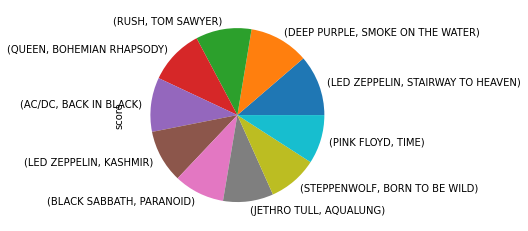

In [19]:
df_rank.groupby(['artist', 'music'])['score'].agg('sum').sort_values(ascending=False)[:10].plot(kind='pie');

In [20]:
df_rank.groupby(['artist'])['score'].agg('sum').sort_values(ascending=False)[:10]

artist
LED ZEPPELIN     96466
QUEEN            84970
PINK FLOYD       70695
AC/DC            67439
BEATLES          59727
DEEP PURPLE      59187
BLACK SABBATH    56505
RUSH             55897
THE BEATLES      52639
AEROSMITH        50732
Name: score, dtype: int64